<h1><center> Statistiques sous Python (avec Pandas) </center></h1>

## Analyse de Données Massives

Nous allons utiliser dans cet exercice le module pandas permettant l'analyse de données avec Python. La première instruction est d'installer le module, à faire dans un terminale de commande.
<br>

- pip install pandas

Une fois le module est installé, nous pouvons lancer un notebook pour commencer notre programme. Il faut tout d'abord importer le module.


In [42]:
!pip install pandas
# Importatioon du module pandas
import pandas as pd
import numpy as np



## Données
    
    
Nous allons travailler sur des données collectées par un serveur (data.csv). Il a enregistré des informations sur chaque pourboire qu'il a reçu sur une période de quelques mois en travaillant dans un restaurant. Il a collecté plusieurs variables:

1. facture en dollars,

2. pourboire en dollars,

3. sexe du payeur de factures,

4. s'il y avait des fumeurs dans la fête,

5. jour de la semaine,

6. moment de la journée,

7. taille de la fête.


- Lire ces données dans le <code>Notebook</code> avec <code>read_csv()</code> de <code>pandas</code>.</p>


In [2]:
# Lecture d'un fichier csv avec pandas
df = pd.read_csv('data.csv')

print(df)
type(df)

     Facture  Pourboire     sex Fumeur  Jour    time  size
0      16.99       1.01  Female     No   Sun  Dinner     2
1      10.34       1.66    Male     No   Sun  Dinner     3
2      21.01       3.50    Male     No   Sun  Dinner     3
3      23.68       3.31    Male     No   Sun  Dinner     2
4      24.59       3.61  Female     No   Sun  Dinner     4
..       ...        ...     ...    ...   ...     ...   ...
239    29.03       5.92    Male     No   Sat  Dinner     3
240    27.18       2.00  Female    Yes   Sat  Dinner     2
241    22.67       2.00    Male    Yes   Sat  Dinner     2
242    17.82       1.75    Male     No   Sat  Dinner     2
243    18.78       3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


pandas.core.frame.DataFrame


<p>Sur ces données, il est bien évidemment possible de voir quelques informations classiques.</p>


In [3]:
# Type des données
df.dtypes


Facture      float64
Pourboire    float64
sex           object
Fumeur        object
Jour          object
time          object
size           int64
dtype: object

In [4]:
# Taille

print(df.size)
df.axes

1708


[RangeIndex(start=0, stop=244, step=1),
 Index(['Facture', 'Pourboire', 'sex', 'Fumeur', 'Jour', 'time', 'size'], dtype='object')]

In [5]:
#nombre d'observation par champs

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facture    244 non-null    float64
 1   Pourboire  244 non-null    float64
 2   sex        244 non-null    object 
 3   Fumeur     244 non-null    object 
 4   Jour       244 non-null    object 
 5   time       244 non-null    object 
 6   size       244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
# Afficher l'entête du jeu de données dans une liste
df.head


<bound method NDFrame.head of      Facture  Pourboire     sex Fumeur  Jour    time  size
0      16.99       1.01  Female     No   Sun  Dinner     2
1      10.34       1.66    Male     No   Sun  Dinner     3
2      21.01       3.50    Male     No   Sun  Dinner     3
3      23.68       3.31    Male     No   Sun  Dinner     2
4      24.59       3.61  Female     No   Sun  Dinner     4
..       ...        ...     ...    ...   ...     ...   ...
239    29.03       5.92    Male     No   Sat  Dinner     3
240    27.18       2.00  Female    Yes   Sat  Dinner     2
241    22.67       2.00    Male    Yes   Sat  Dinner     2
242    17.82       1.75    Male     No   Sat  Dinner     2
243    18.78       3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>


## Statistiques descriptives univariés


- Décrire et afficher toutes les variables quantitatives du jeu de données directement (fichier csv).
  ex: nombre d'obseravtions, moyenne, écart-type, min-max, quantile Q1, quantile Q2, quantile Q3

In [7]:
df.describe()

,Facture,Pourboire,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


- Arrandire les valeurs (2 chiffres après la virgule)

In [8]:
print(df.round())

     Facture  Pourboire     sex Fumeur  Jour    time  size
0       17.0        1.0  Female     No   Sun  Dinner     2
1       10.0        2.0    Male     No   Sun  Dinner     3
2       21.0        4.0    Male     No   Sun  Dinner     3
3       24.0        3.0    Male     No   Sun  Dinner     2
4       25.0        4.0  Female     No   Sun  Dinner     4
..       ...        ...     ...    ...   ...     ...   ...
239     29.0        6.0    Male     No   Sat  Dinner     3
240     27.0        2.0  Female    Yes   Sat  Dinner     2
241     23.0        2.0    Male    Yes   Sat  Dinner     2
242     18.0        2.0    Male     No   Sat  Dinner     2
243     19.0        3.0  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


- Décrire juste une seule variable quantitative (ex: <code>"facture"</code>).</p>

In [9]:
df["Facture"].dtypes

dtype('float64')

- Calculer sa moyenne, écart-type, variance, médiane, min, max, quantiles

In [10]:
df["Facture"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: Facture, dtype: float64


## Histogramme

Pour représenter graphiquement les variables d'un jeu de données, <code>pandas</code> met à disposition (via le module <code>matplotlib</code> utilisé par <code>pandas</code>) des fonctions graphiques.

- Réaliser un <strong>histogramme</strong>, en utilisant une version avec la fonction <code>hist()</code>. 

- Une deuxième version avec la fonction <code>plot()</code>.

- Réaliser les deux fonctions précedentes, mais seulement pour une seule variable du jeu de données

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279D383E310>,
      dtype=object)

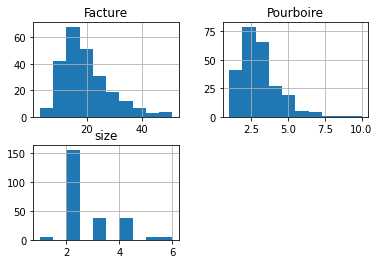

In [11]:
df.hist()

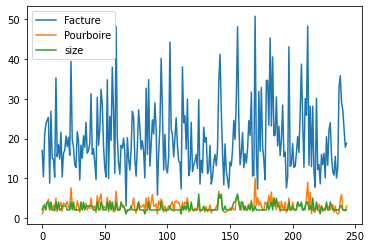

In [12]:
df.plot()

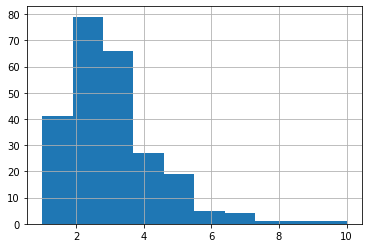

In [13]:
df["Pourboire"].hist()

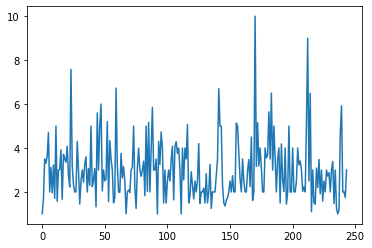

In [14]:
df["Pourboire"].plot()


## Boîtes à moustaches
    
    
- Afficher les <strong>boîtes à moustaches</strong> du jeu de données.

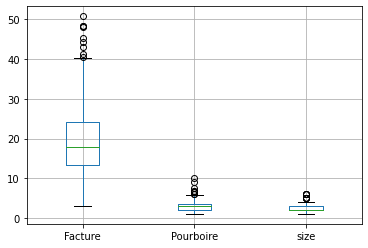

In [15]:
df.boxplot()

- Afficher <strong>la boîte à moustache</strong> d'une variable spécifique.

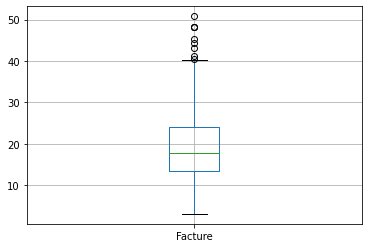

In [16]:
#df["Pourboire"].plot(kind="box")
df.boxplot("Facture")

- Afficher <strong>la boîte à moustache</strong> d'une variable spécifique en enlevant la gride.

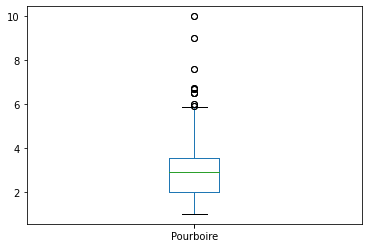

In [17]:
df["Pourboire"].plot(kind="box", grid=False)
df.boxplot("Pourboire", grid=False)


## Qualitative
    
- Afficher la table d'occurences (ou des effectifs) des variables qualitatives, ainsi que la table des proportions des modalités.</p>


In [24]:
print(df["sex"].value_counts())
print(df["Fumeur"].value_counts())
print(df["Jour"].value_counts())
print(df["time"].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: Fumeur, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: Jour, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


In [25]:
print(df["sex"].describe())

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object


- Calculer le nombre d'occurence par modalité de la variable sex par deux versions (value_counts() et crosstab() )

In [26]:
print(df.sex.value_counts())
print(pd.crosstab(df.sex, "Sexe", colnames=["Catégorie"]))

Male      157
Female     87
Name: sex, dtype: int64
Catégorie  Sexe
sex            
Female       87
Male        157


- Calculer le nombre d'occurence normalisé par modalité de la variable sex par deux versions

In [27]:
print(df.sex.value_counts(normalize=True))
print(pd.crosstab(df.sex, "Sexe", colnames=["Catégorie"], normalize=True))

Male      0.643443
Female    0.356557
Name: sex, dtype: float64
Catégorie      Sexe
sex                
Female     0.356557
Male       0.643443



### Diagramme en barres 
    
- Réaliser un <strong>diagramme en barres</strong>, en utilisant le type <code>"bar"</code> pour <code>plot()</code>. 


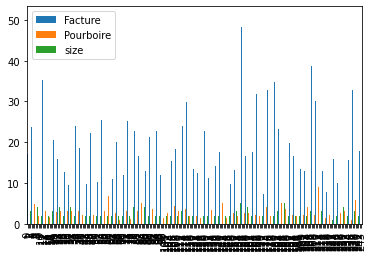

In [28]:
df.plot(kind="bar")


### Diagramme circulaire

- Réaliser un <strong>diagramme circulaire</strong>, pour le tableau des effectifs de la variable sex produit par <code>crosstab()</code>.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000279D674F370>],
      dtype=object)

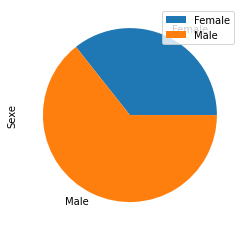

In [29]:
pd.crosstab(df.sex, "Sexe", colnames=["Catégorie"], normalize=True).plot(kind="pie", subplots=True)

## Statistiques descriptives bivariées

### Quantitative

- Calculer la correlation entre les différentes variables du jeu de données.

In [30]:
df.corr()

,Facture,Pourboire,size
Facture,1.000000,0.675734,0.598315
Pourboire,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


- Calculer la correlation entre deux variables du jeu de données.

In [31]:
df["Pourboire"].corr(df["Facture"], method='pearson')

0.6757341092113641

- Calculer la covarriance entre deux variables du jeu de données.

In [32]:
df["Pourboire"].cov(df["Facture"])

8.323501629224854


### Nuage de points

- Afficher le nuage des points des deux variables X=facture et Y=pourboire

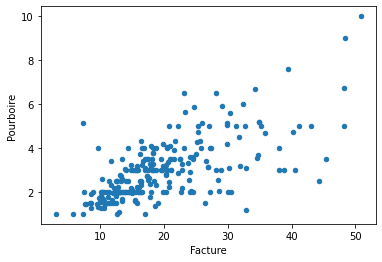

In [33]:
df.plot(kind='scatter', x="Facture", y="Pourboire")


### Qualitative


In [37]:
# Afficher la table croisée du nombre des fumeurs et non fumeurs selon leur sex dans le jeux de données
pd.crosstab(df.sex, df.Fumeur)

Fumeur,No,Yes
sex,,
Female,54,33
Male,97,60


In [38]:
# Afficher la table croisée du nombre des fumeurs et non fumeurs selon leur sex avec le nombre total de chaque ligne/colonne dans le jeux de données

pd.crosstab(df.sex, df.Fumeur, margins=True)


Fumeur,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [39]:
# Afficher la table croisée normalisée du nombre des fumeurs et non fumeurs selon leur sex dans le jeux de données


pd.crosstab(df.sex, df.Fumeur, normalize=True)

Fumeur,No,Yes
sex,,
Female,0.221311,0.135246
Male,0.397541,0.245902


In [40]:
# Afficher la moyenne des factures, pourboires et size selon la variable sex

df.groupby("sex").mean()

,Facture,Pourboire,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [41]:
# Afficher la moyenne des factures, pourboires, size groupée par sex

df.groupby("sex").mean()


,Facture,Pourboire,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [43]:
# Afficher la moyenne, l'écart-type, médiane, min et max de la variable facture groupés par sex

df.groupby("sex")["Facture"].agg([np.mean, np.std, np.median, np.min, np.max])

,mean,std,median,amin,amax
sex,,,,,
Female,18.056897,8.009209,16.40,3.07,44.30
Male,20.744076,9.246469,18.35,7.25,50.81


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000279D7F5A250>,
      dtype=object)

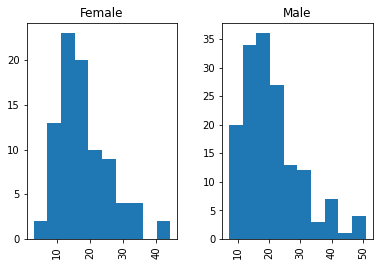

In [44]:
# Afficher les deux histogrammes de la variable facture selon le sex
df.hist(column = "Facture", by = "sex")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279D90F23A0>,
      dtype=object)

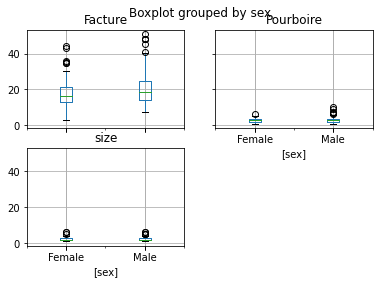

In [45]:
# Afficher les boites à moustache de toutes les variables (facture, pourboire, size) selon le sex
df.boxplot(by = "sex")



### Diagramme en barres


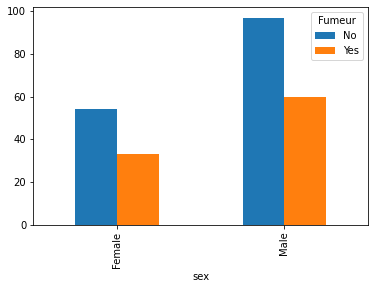

In [53]:
# Afficher le diagramme en barres du nombre des fumeurs et non fumeurs selon leur sex

pd.crosstab(df.sex, df.Fumeur).plot(kind="bar")

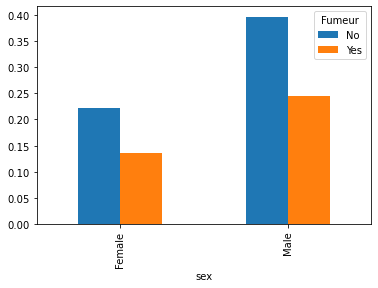

In [55]:
# Afficher le diagramme en barres du nombre des fumeurs et non fumeurs selon leur sex normalisé

pd.crosstab(df.sex, df.Fumeur, normalize=True).plot(kind="bar")


## Exercices

A partir du fichier <code>diamonds.csv</code></a>, analyser les données suivant le déroulement classique

- Description de chaque variable

- Recherche des liens entre le prix (<code>price</code>) et les autres variables
